# 🧠 Ethereum Smart Contract Analysis

This notebook demonstrates how to connect to the Ethereum mainnet, load a smart contract using Web3.py, and perform basic data extraction and analysis from the blockchain.

## 📊 Data Analysis and Visualization

Once the data is retrieved, we use Python libraries like Pandas and Matplotlib to analyze and visualize insights from the smart contract data.

In [139]:
!pip install web3
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from web3 import Web3
import json


## 🔌 Connecting to Ethereum Mainnet

We use Infura as our Ethereum node provider and Web3.py to connect to the blockchain. The Infura endpoint is required for remote connection.

In [140]:
from web3 import Web3

# Define the Infura URL and initialize Web3
infura_url = ""<REMOVED_FOR_SECURITY>""
web3_instance = Web3(Web3.HTTPProvider(infura_url))

# Check the connection status in a more Pythonic way
connection_status = "Successful" if web3_instance.is_connected() else "Failed"
print(connection_status)


Successful


In [141]:
contract_address = "0xc3d688B66703497DAA19211EEdff47f25384cdc3"
abi = json.loads("""[{"inputs":[{"components":[{"internalType":"address","name":"governor","type":"address"},{"internalType":"address","name":"pauseGuardian","type":"address"},{"internalType":"address","name":"baseToken","type":"address"},{"internalType":"address","name":"baseTokenPriceFeed","type":"address"},{"internalType":"address","name":"extensionDelegate","type":"address"},{"internalType":"uint64","name":"supplyKink","type":"uint64"},{"internalType":"uint64","name":"supplyPerYearInterestRateSlopeLow","type":"uint64"},{"internalType":"uint64","name":"supplyPerYearInterestRateSlopeHigh","type":"uint64"},{"internalType":"uint64","name":"supplyPerYearInterestRateBase","type":"uint64"},{"internalType":"uint64","name":"borrowKink","type":"uint64"},{"internalType":"uint64","name":"borrowPerYearInterestRateSlopeLow","type":"uint64"},{"internalType":"uint64","name":"borrowPerYearInterestRateSlopeHigh","type":"uint64"},{"internalType":"uint64","name":"borrowPerYearInterestRateBase","type":"uint64"},{"internalType":"uint64","name":"storeFrontPriceFactor","type":"uint64"},{"internalType":"uint64","name":"trackingIndexScale","type":"uint64"},{"internalType":"uint64","name":"baseTrackingSupplySpeed","type":"uint64"},{"internalType":"uint64","name":"baseTrackingBorrowSpeed","type":"uint64"},{"internalType":"uint104","name":"baseMinForRewards","type":"uint104"},{"internalType":"uint104","name":"baseBorrowMin","type":"uint104"},{"internalType":"uint104","name":"targetReserves","type":"uint104"},{"components":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"address","name":"priceFeed","type":"address"},{"internalType":"uint8","name":"decimals","type":"uint8"},{"internalType":"uint64","name":"borrowCollateralFactor","type":"uint64"},{"internalType":"uint64","name":"liquidateCollateralFactor","type":"uint64"},{"internalType":"uint64","name":"liquidationFactor","type":"uint64"},{"internalType":"uint128","name":"supplyCap","type":"uint128"}],"internalType":"struct CometConfiguration.AssetConfig[]","name":"assetConfigs","type":"tuple[]"}],"internalType":"struct CometConfiguration.Configuration","name":"config","type":"tuple"}],"stateMutability":"nonpayable","type":"constructor"},{"inputs":[],"name":"Absurd","type":"error"},{"inputs":[],"name":"AlreadyInitialized","type":"error"},{"inputs":[],"name":"BadAsset","type":"error"},{"inputs":[],"name":"BadDecimals","type":"error"},{"inputs":[],"name":"BadDiscount","type":"error"},{"inputs":[],"name":"BadMinimum","type":"error"},{"inputs":[],"name":"BadPrice","type":"error"},{"inputs":[],"name":"BorrowCFTooLarge","type":"error"},{"inputs":[],"name":"BorrowTooSmall","type":"error"},{"inputs":[],"name":"InsufficientReserves","type":"error"},{"inputs":[],"name":"InvalidInt104","type":"error"},{"inputs":[],"name":"InvalidInt256","type":"error"},{"inputs":[],"name":"InvalidUInt104","type":"error"},{"inputs":[],"name":"InvalidUInt128","type":"error"},{"inputs":[],"name":"InvalidUInt64","type":"error"},{"inputs":[],"name":"LiquidateCFTooLarge","type":"error"},{"inputs":[],"name":"NegativeNumber","type":"error"},{"inputs":[],"name":"NoSelfTransfer","type":"error"},{"inputs":[],"name":"NotCollateralized","type":"error"},{"inputs":[],"name":"NotForSale","type":"error"},{"inputs":[],"name":"NotLiquidatable","type":"error"},{"inputs":[],"name":"Paused","type":"error"},{"inputs":[],"name":"SupplyCapExceeded","type":"error"},{"inputs":[],"name":"TimestampTooLarge","type":"error"},{"inputs":[],"name":"TooManyAssets","type":"error"},{"inputs":[],"name":"TooMuchSlippage","type":"error"},{"inputs":[],"name":"TransferInFailed","type":"error"},{"inputs":[],"name":"TransferOutFailed","type":"error"},{"inputs":[],"name":"Unauthorized","type":"error"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"absorber","type":"address"},{"indexed":true,"internalType":"address","name":"borrower","type":"address"},{"indexed":true,"internalType":"address","name":"asset","type":"address"},{"indexed":false,"internalType":"uint256","name":"collateralAbsorbed","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"usdValue","type":"uint256"}],"name":"AbsorbCollateral","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"absorber","type":"address"},{"indexed":true,"internalType":"address","name":"borrower","type":"address"},{"indexed":false,"internalType":"uint256","name":"basePaidOut","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"usdValue","type":"uint256"}],"name":"AbsorbDebt","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"buyer","type":"address"},{"indexed":true,"internalType":"address","name":"asset","type":"address"},{"indexed":false,"internalType":"uint256","name":"baseAmount","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"collateralAmount","type":"uint256"}],"name":"BuyCollateral","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"bool","name":"supplyPaused","type":"bool"},{"indexed":false,"internalType":"bool","name":"transferPaused","type":"bool"},{"indexed":false,"internalType":"bool","name":"withdrawPaused","type":"bool"},{"indexed":false,"internalType":"bool","name":"absorbPaused","type":"bool"},{"indexed":false,"internalType":"bool","name":"buyPaused","type":"bool"}],"name":"PauseAction","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"dst","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"}],"name":"Supply","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"dst","type":"address"},{"indexed":true,"internalType":"address","name":"asset","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"}],"name":"SupplyCollateral","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"}],"name":"Transfer","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"},{"indexed":true,"internalType":"address","name":"asset","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"}],"name":"TransferCollateral","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"src","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"}],"name":"Withdraw","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"src","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"},{"indexed":true,"internalType":"address","name":"asset","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"}],"name":"WithdrawCollateral","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"to","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"}],"name":"WithdrawReserves","type":"event"},{"stateMutability":"payable","type":"fallback"},{"inputs":[{"internalType":"address","name":"absorber","type":"address"},{"internalType":"address[]","name":"accounts","type":"address[]"}],"name":"absorb","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"account","type":"address"}],"name":"accrueAccount","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"manager","type":"address"},{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"approveThis","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"account","type":"address"}],"name":"balanceOf","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"baseBorrowMin","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"baseMinForRewards","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"baseScale","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"baseToken","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"baseTokenPriceFeed","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"baseTrackingBorrowSpeed","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"baseTrackingSupplySpeed","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"account","type":"address"}],"name":"borrowBalanceOf","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"borrowKink","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"borrowPerSecondInterestRateBase","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"borrowPerSecondInterestRateSlopeHigh","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"borrowPerSecondInterestRateSlopeLow","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"minAmount","type":"uint256"},{"internalType":"uint256","name":"baseAmount","type":"uint256"},{"internalType":"address","name":"recipient","type":"address"}],"name":"buyCollateral","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"extensionDelegate","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint8","name":"i","type":"uint8"}],"name":"getAssetInfo","outputs":[{"components":[{"internalType":"uint8","name":"offset","type":"uint8"},{"internalType":"address","name":"asset","type":"address"},{"internalType":"address","name":"priceFeed","type":"address"},{"internalType":"uint64","name":"scale","type":"uint64"},{"internalType":"uint64","name":"borrowCollateralFactor","type":"uint64"},{"internalType":"uint64","name":"liquidateCollateralFactor","type":"uint64"},{"internalType":"uint64","name":"liquidationFactor","type":"uint64"},{"internalType":"uint128","name":"supplyCap","type":"uint128"}],"internalType":"struct CometCore.AssetInfo","name":"","type":"tuple"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"}],"name":"getAssetInfoByAddress","outputs":[{"components":[{"internalType":"uint8","name":"offset","type":"uint8"},{"internalType":"address","name":"asset","type":"address"},{"internalType":"address","name":"priceFeed","type":"address"},{"internalType":"uint64","name":"scale","type":"uint64"},{"internalType":"uint64","name":"borrowCollateralFactor","type":"uint64"},{"internalType":"uint64","name":"liquidateCollateralFactor","type":"uint64"},{"internalType":"uint64","name":"liquidationFactor","type":"uint64"},{"internalType":"uint128","name":"supplyCap","type":"uint128"}],"internalType":"struct CometCore.AssetInfo","name":"","type":"tuple"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"utilization","type":"uint256"}],"name":"getBorrowRate","outputs":[{"internalType":"uint64","name":"","type":"uint64"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"}],"name":"getCollateralReserves","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"priceFeed","type":"address"}],"name":"getPrice","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"getReserves","outputs":[{"internalType":"int256","name":"","type":"int256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"utilization","type":"uint256"}],"name":"getSupplyRate","outputs":[{"internalType":"uint64","name":"","type":"uint64"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"getUtilization","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"governor","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"owner","type":"address"},{"internalType":"address","name":"manager","type":"address"}],"name":"hasPermission","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"initializeStorage","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"isAbsorbPaused","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"},{"internalType":"address","name":"","type":"address"}],"name":"isAllowed","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"account","type":"address"}],"name":"isBorrowCollateralized","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"isBuyPaused","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"account","type":"address"}],"name":"isLiquidatable","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"isSupplyPaused","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"isTransferPaused","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"isWithdrawPaused","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"liquidatorPoints","outputs":[{"internalType":"uint32","name":"numAbsorbs","type":"uint32"},{"internalType":"uint64","name":"numAbsorbed","type":"uint64"},{"internalType":"uint128","name":"approxSpend","type":"uint128"},{"internalType":"uint32","name":"_reserved","type":"uint32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"numAssets","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"bool","name":"supplyPaused","type":"bool"},{"internalType":"bool","name":"transferPaused","type":"bool"},{"internalType":"bool","name":"withdrawPaused","type":"bool"},{"internalType":"bool","name":"absorbPaused","type":"bool"},{"internalType":"bool","name":"buyPaused","type":"bool"}],"name":"pause","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"pauseGuardian","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"baseAmount","type":"uint256"}],"name":"quoteCollateral","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"storeFrontPriceFactor","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"supply","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"from","type":"address"},{"internalType":"address","name":"dst","type":"address"},{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"supplyFrom","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"supplyKink","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"supplyPerSecondInterestRateBase","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"supplyPerSecondInterestRateSlopeHigh","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"supplyPerSecondInterestRateSlopeLow","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"dst","type":"address"},{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"supplyTo","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"targetReserves","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"totalBorrow","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"totalSupply","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"totalsCollateral","outputs":[{"internalType":"uint128","name":"totalSupplyAsset","type":"uint128"},{"internalType":"uint128","name":"_reserved","type":"uint128"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"trackingIndexScale","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"dst","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"transfer","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"dst","type":"address"},{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"transferAsset","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"src","type":"address"},{"internalType":"address","name":"dst","type":"address"},{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"transferAssetFrom","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"src","type":"address"},{"internalType":"address","name":"dst","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"transferFrom","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"userBasic","outputs":[{"internalType":"int104","name":"principal","type":"int104"},{"internalType":"uint64","name":"baseTrackingIndex","type":"uint64"},{"internalType":"uint64","name":"baseTrackingAccrued","type":"uint64"},{"internalType":"uint16","name":"assetsIn","type":"uint16"},{"internalType":"uint8","name":"_reserved","type":"uint8"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"},{"internalType":"address","name":"","type":"address"}],"name":"userCollateral","outputs":[{"internalType":"uint128","name":"balance","type":"uint128"},{"internalType":"uint128","name":"_reserved","type":"uint128"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"userNonce","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"withdraw","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"src","type":"address"},{"internalType":"address","name":"to","type":"address"},{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"withdrawFrom","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"withdrawReserves","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"to","type":"address"},{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"}],"name":"withdrawTo","outputs":[],"stateMutability":"nonpayable","type":"function"}]""")
contract = web3.eth.contract(address=contract_address, abi=abi)


## 📜 Loading the Smart Contract

The contract address and ABI are used to load the deployed smart contract. This allows us to read data from and interact with the contract methods.

In [143]:
decimals_value = contract.functions.decimals().call()
decimals_value



6

In [144]:

number_of_assets = contract.functions.numAssets().call()
number_of_assets

8

In [145]:
# Iterate through the assets and retrieve information more efficiently
for index in range(asset_number):
    asset_info = contract.functions.getAssetInfo(index).call()  # Store the result to avoid multiple calls
    print(asset_info)
    print('collateral_order', asset_info[0])
    print('collateral_token', asset_info[1])
    print('chainlink_price_feed', asset_info[2])
    print('------------------------------------------------')


(0, '0xc00e94Cb662C3520282E6f5717214004A7f26888', '0xdbd020CAeF83eFd542f4De03e3cF0C28A4428bd5', 1000000000000000000, 500000000000000000, 700000000000000000, 750000000000000000, 100000000000000000000000)
collateral_order 0
collateral_token 0xc00e94Cb662C3520282E6f5717214004A7f26888
chainlink_price_feed 0xdbd020CAeF83eFd542f4De03e3cF0C28A4428bd5
------------------------------------------------
(1, '0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599', '0xF4030086522a5bEEa4988F8cA5B36dbC97BeE88c', 100000000, 800000000000000000, 850000000000000000, 900000000000000000, 1000000000000)
collateral_order 1
collateral_token 0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599
chainlink_price_feed 0xF4030086522a5bEEa4988F8cA5B36dbC97BeE88c
------------------------------------------------
(2, '0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2', '0x5f4eC3Df9cbd43714FE2740f5E3616155c5b8419', 1000000000000000000, 825000000000000000, 895000000000000000, 950000000000000000, 500000000000000000000000)
collateral_order 2
collatera

In [146]:
erc_abi="[{\"inputs\":[{\"internalType\":\"uint256\",\"name\":\"chainId_\",\"type\":\"uint256\"}],\"payable\":false,\"stateMutability\":\"nonpayable\",\"type\":\"constructor\"},{\"anonymous\":false,\"inputs\":[{\"indexed\":true,\"internalType\":\"address\",\"name\":\"src\",\"type\":\"address\"},{\"indexed\":true,\"internalType\":\"address\",\"name\":\"guy\",\"type\":\"address\"},{\"indexed\":false,\"internalType\":\"uint256\",\"name\":\"wad\",\"type\":\"uint256\"}],\"name\":\"Approval\",\"type\":\"event\"},{\"anonymous\":true,\"inputs\":[{\"indexed\":true,\"internalType\":\"bytes4\",\"name\":\"sig\",\"type\":\"bytes4\"},{\"indexed\":true,\"internalType\":\"address\",\"name\":\"usr\",\"type\":\"address\"},{\"indexed\":true,\"internalType\":\"bytes32\",\"name\":\"arg1\",\"type\":\"bytes32\"},{\"indexed\":true,\"internalType\":\"bytes32\",\"name\":\"arg2\",\"type\":\"bytes32\"},{\"indexed\":false,\"internalType\":\"bytes\",\"name\":\"data\",\"type\":\"bytes\"}],\"name\":\"LogNote\",\"type\":\"event\"},{\"anonymous\":false,\"inputs\":[{\"indexed\":true,\"internalType\":\"address\",\"name\":\"src\",\"type\":\"address\"},{\"indexed\":true,\"internalType\":\"address\",\"name\":\"dst\",\"type\":\"address\"},{\"indexed\":false,\"internalType\":\"uint256\",\"name\":\"wad\",\"type\":\"uint256\"}],\"name\":\"Transfer\",\"type\":\"event\"},{\"constant\":true,\"inputs\":[],\"name\":\"DOMAIN_SEPARATOR\",\"outputs\":[{\"internalType\":\"bytes32\",\"name\":\"\",\"type\":\"bytes32\"}],\"payable\":false,\"stateMutability\":\"view\",\"type\":\"function\"},{\"constant\":true,\"inputs\":[],\"name\":\"PERMIT_TYPEHASH\",\"outputs\":[{\"internalType\":\"bytes32\",\"name\":\"\",\"type\":\"bytes32\"}],\"payable\":false,\"stateMutability\":\"view\",\"type\":\"function\"},{\"constant\":true,\"inputs\":[{\"internalType\":\"address\",\"name\":\"\",\"type\":\"address\"},{\"internalType\":\"address\",\"name\":\"\",\"type\":\"address\"}],\"name\":\"allowance\",\"outputs\":[{\"internalType\":\"uint256\",\"name\":\"\",\"type\":\"uint256\"}],\"payable\":false,\"stateMutability\":\"view\",\"type\":\"function\"},{\"constant\":false,\"inputs\":[{\"internalType\":\"address\",\"name\":\"usr\",\"type\":\"address\"},{\"internalType\":\"uint256\",\"name\":\"wad\",\"type\":\"uint256\"}],\"name\":\"approve\",\"outputs\":[{\"internalType\":\"bool\",\"name\":\"\",\"type\":\"bool\"}],\"payable\":false,\"stateMutability\":\"nonpayable\",\"type\":\"function\"},{\"constant\":true,\"inputs\":[{\"internalType\":\"address\",\"name\":\"\",\"type\":\"address\"}],\"name\":\"balanceOf\",\"outputs\":[{\"internalType\":\"uint256\",\"name\":\"\",\"type\":\"uint256\"}],\"payable\":false,\"stateMutability\":\"view\",\"type\":\"function\"},{\"constant\":false,\"inputs\":[{\"internalType\":\"address\",\"name\":\"usr\",\"type\":\"address\"},{\"internalType\":\"uint256\",\"name\":\"wad\",\"type\":\"uint256\"}],\"name\":\"burn\",\"outputs\":[],\"payable\":false,\"stateMutability\":\"nonpayable\",\"type\":\"function\"},{\"constant\":true,\"inputs\":[],\"name\":\"decimals\",\"outputs\":[{\"internalType\":\"uint8\",\"name\":\"\",\"type\":\"uint8\"}],\"payable\":false,\"stateMutability\":\"view\",\"type\":\"function\"},{\"constant\":false,\"inputs\":[{\"internalType\":\"address\",\"name\":\"guy\",\"type\":\"address\"}],\"name\":\"deny\",\"outputs\":[],\"payable\":false,\"stateMutability\":\"nonpayable\",\"type\":\"function\"},{\"constant\":false,\"inputs\":[{\"internalType\":\"address\",\"name\":\"usr\",\"type\":\"address\"},{\"internalType\":\"uint256\",\"name\":\"wad\",\"type\":\"uint256\"}],\"name\":\"mint\",\"outputs\":[],\"payable\":false,\"stateMutability\":\"nonpayable\",\"type\":\"function\"},{\"constant\":false,\"inputs\":[{\"internalType\":\"address\",\"name\":\"src\",\"type\":\"address\"},{\"internalType\":\"address\",\"name\":\"dst\",\"type\":\"address\"},{\"internalType\":\"uint256\",\"name\":\"wad\",\"type\":\"uint256\"}],\"name\":\"move\",\"outputs\":[],\"payable\":false,\"stateMutability\":\"nonpayable\",\"type\":\"function\"},{\"constant\":true,\"inputs\":[],\"name\":\"name\",\"outputs\":[{\"internalType\":\"string\",\"name\":\"\",\"type\":\"string\"}],\"payable\":false,\"stateMutability\":\"view\",\"type\":\"function\"},{\"constant\":true,\"inputs\":[{\"internalType\":\"address\",\"name\":\"\",\"type\":\"address\"}],\"name\":\"nonces\",\"outputs\":[{\"internalType\":\"uint256\",\"name\":\"\",\"type\":\"uint256\"}],\"payable\":false,\"stateMutability\":\"view\",\"type\":\"function\"},{\"constant\":false,\"inputs\":[{\"internalType\":\"address\",\"name\":\"holder\",\"type\":\"address\"},{\"internalType\":\"address\",\"name\":\"spender\",\"type\":\"address\"},{\"internalType\":\"uint256\",\"name\":\"nonce\",\"type\":\"uint256\"},{\"internalType\":\"uint256\",\"name\":\"expiry\",\"type\":\"uint256\"},{\"internalType\":\"bool\",\"name\":\"allowed\",\"type\":\"bool\"},{\"internalType\":\"uint8\",\"name\":\"v\",\"type\":\"uint8\"},{\"internalType\":\"bytes32\",\"name\":\"r\",\"type\":\"bytes32\"},{\"internalType\":\"bytes32\",\"name\":\"s\",\"type\":\"bytes32\"}],\"name\":\"permit\",\"outputs\":[],\"payable\":false,\"stateMutability\":\"nonpayable\",\"type\":\"function\"},{\"constant\":false,\"inputs\":[{\"internalType\":\"address\",\"name\":\"usr\",\"type\":\"address\"},{\"internalType\":\"uint256\",\"name\":\"wad\",\"type\":\"uint256\"}],\"name\":\"pull\",\"outputs\":[],\"payable\":false,\"stateMutability\":\"nonpayable\",\"type\":\"function\"},{\"constant\":false,\"inputs\":[{\"internalType\":\"address\",\"name\":\"usr\",\"type\":\"address\"},{\"internalType\":\"uint256\",\"name\":\"wad\",\"type\":\"uint256\"}],\"name\":\"push\",\"outputs\":[],\"payable\":false,\"stateMutability\":\"nonpayable\",\"type\":\"function\"},{\"constant\":false,\"inputs\":[{\"internalType\":\"address\",\"name\":\"guy\",\"type\":\"address\"}],\"name\":\"rely\",\"outputs\":[],\"payable\":false,\"stateMutability\":\"nonpayable\",\"type\":\"function\"},{\"constant\":true,\"inputs\":[],\"name\":\"symbol\",\"outputs\":[{\"internalType\":\"string\",\"name\":\"\",\"type\":\"string\"}],\"payable\":false,\"stateMutability\":\"view\",\"type\":\"function\"},{\"constant\":true,\"inputs\":[],\"name\":\"totalSupply\",\"outputs\":[{\"internalType\":\"uint256\",\"name\":\"\",\"type\":\"uint256\"}],\"payable\":false,\"stateMutability\":\"view\",\"type\":\"function\"},{\"constant\":false,\"inputs\":[{\"internalType\":\"address\",\"name\":\"dst\",\"type\":\"address\"},{\"internalType\":\"uint256\",\"name\":\"wad\",\"type\":\"uint256\"}],\"name\":\"transfer\",\"outputs\":[{\"internalType\":\"bool\",\"name\":\"\",\"type\":\"bool\"}],\"payable\":false,\"stateMutability\":\"nonpayable\",\"type\":\"function\"},{\"constant\":false,\"inputs\":[{\"internalType\":\"address\",\"name\":\"src\",\"type\":\"address\"},{\"internalType\":\"address\",\"name\":\"dst\",\"type\":\"address\"},{\"internalType\":\"uint256\",\"name\":\"wad\",\"type\":\"uint256\"}],\"name\":\"transferFrom\",\"outputs\":[{\"internalType\":\"bool\",\"name\":\"\",\"type\":\"bool\"}],\"payable\":false,\"stateMutability\":\"nonpayable\",\"type\":\"function\"},{\"constant\":true,\"inputs\":[],\"name\":\"version\",\"outputs\":[{\"internalType\":\"string\",\"name\":\"\",\"type\":\"string\"}],\"payable\":false,\"stateMutability\":\"view\",\"type\":\"function\"},{\"constant\":true,\"inputs\":[{\"internalType\":\"address\",\"name\":\"\",\"type\":\"address\"}],\"name\":\"wards\",\"outputs\":[{\"internalType\":\"uint256\",\"name\":\"\",\"type\":\"uint256\"}],\"payable\":false,\"stateMutability\":\"view\",\"type\":\"function\"}]"

In [147]:
# Define all collateral token addresses in a single list
collateral_addresses = [
    '0xc00e94Cb662C3520282E6f5717214004A7f26888',
    '0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599',
    '0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2',
    '0x1f9840a85d5aF5bf1D1762F925BDADdC4201F984',
    '0x514910771AF9Ca656af840dff83E8264EcF986CA',
    '0x7f39C581F595B53c5cb19bD0b3f8dA6c935E2Ca0',
    '0xcbB7C0000aB88B473b1f5aFd9ef808440eed33Bf',
    '0x18084fbA666a33d37592fA2633fD49a74DD93a88'
]

# Append the base token address fetched from the contract
collateral_addresses.append(contract.functions.baseToken().call())

# Dictionary to store total value locked (TVL)
tvl = {}

# Iterate through collateral addresses and fetch details
for address in collateral_addresses:
    collateral_contract = web3.eth.contract(address=address, abi=erc_abi)
    decimal_units = collateral_contract.functions.decimals().call()
    balance = collateral_contract.functions.balanceOf(contract_address).call()
    locked_value = balance * 10**-decimal_units
    token_name = collateral_contract.functions.name().call()
    
    # Print token name and locked value
    print(token_name, locked_value)
    
    # Store the locked value in the TVL dictionary
    tvl[token_name] = locked_value


Compound 899165.9936771565
Wrapped BTC 7275.60374735
Wrapped Ether 82236.63612003543
Uniswap 859431.1036106219
ChainLink Token 615260.1416150891
Wrapped liquid staked Ether 2.0 19664.110234403972
Coinbase Wrapped BTC 10.36839732
tBTC v2 0.0718230967212341
USD Coin 57188693.557321995


In [148]:
import requests

# Define the URL for fetching the price
url = "https://api.coingecko.com/api/v3/simple/price"
params = {
    "ids": "compound-governance-token",
    "vs_currencies": "usd"
}

# Make the API request and extract the price
response = requests.get(url, params=params)
compound_price_usd = response.json().get("compound-governance-token", {}).get("usd")

# Check if the price was successfully retrieved
if compound_price_usd is not None:
    print("Compound Governance Token Price (USD):", compound_price_usd)
else:
    print("Failed to fetch the price.")


Compound Governance Token Price (USD): 41.1


In [149]:
import requests

# Define the URL for fetching Wrapped Bitcoin price
url = "https://api.coingecko.com/api/v3/simple/price"
params = {
    "ids": "wrapped-bitcoin",
    "vs_currencies": "usd"
}

# Make the API request and safely extract the price
try:
    response = requests.get(url, params=params)
    response.raise_for_status()  # Check if the request was successful
    wrapped_btc_price_usd = response.json().get("wrapped-bitcoin", {}).get("usd")
    
    # Check if the price was successfully retrieved
    if wrapped_btc_price_usd is not None:
        print("Wrapped Bitcoin Price (USD):", wrapped_btc_price_usd)
    else:
        print("Failed to retrieve Wrapped Bitcoin price.")
except requests.exceptions.RequestException as e:
    print("An error occurred:", e)


Wrapped Bitcoin Price (USD): 68958


In [150]:
import requests

# Define the base URL and the tokens to fetch
base_url = "https://api.coingecko.com/api/v3/simple/price"
tokens = ["weth", "uniswap"]
params = {
    "ids": ",".join(tokens),  # Join token IDs with commas for a single API call
    "vs_currencies": "usd"
}

# Make the API request
try:
    response = requests.get(base_url, params=params)
    response.raise_for_status()  # Check if the request was successful
    prices = response.json()

    # Extract prices safely
    weth_price = prices.get("weth", {}).get("usd")
    uniswap_price = prices.get("uniswap", {}).get("usd")

    # Display prices if they were successfully retrieved
    if weth_price is not None:
        print("WETH Price (USD):", weth_price)
    else:
        print("Failed to retrieve WETH price.")

    if uniswap_price is not None:
        print("Uniswap Price (USD):", uniswap_price)
    else:
        print("Failed to retrieve Uniswap price.")

except requests.exceptions.RequestException as e:
    print("An error occurred:", e)


WETH Price (USD): 2482.19
Uniswap Price (USD): 7.36


In [151]:
import requests

# Define the URL and parameters for fetching the Chainlink price
url = "https://api.coingecko.com/api/v3/simple/price"
params = {
    "ids": "chainlink",
    "vs_currencies": "usd"
}

# Make the API request and handle potential errors
try:
    response = requests.get(url, params=params)
    response.raise_for_status()  # Check if the request was successful
    chainlink_price_usd = response.json().get("chainlink", {}).get("usd")

    # Check if the price was successfully retrieved
    if chainlink_price_usd is not None:
        print("Chainlink Price (USD):", chainlink_price_usd)
    else:
        print("Failed to retrieve Chainlink price.")
except requests.exceptions.RequestException as e:
    print("An error occurred:", e)


Chainlink Price (USD): 11.19


In [152]:
import requests

# Define the URL and parameters for fetching the Wrapped stETH price
url = "https://api.coingecko.com/api/v3/simple/price"
params = {
    "ids": "wrapped-steth",
    "vs_currencies": "usd"
}

# Make the API request and handle potential errors
try:
    response = requests.get(url, params=params)
    response.raise_for_status()  # Check if the request was successful
    wrapped_steth_price_usd = response.json().get("wrapped-steth", {}).get("usd")

    # Check if the price was successfully retrieved
    if wrapped_steth_price_usd is not None:
        print("Wrapped stETH Price (USD):", wrapped_steth_price_usd)
    else:
        print("Failed to retrieve Wrapped stETH price.")
except requests.exceptions.RequestException as e:
    print("An error occurred:", e)


Wrapped stETH Price (USD): 2938.93


In [153]:
import requests

# Define the URL and parameters for fetching the Coinbase Wrapped BTC price
url = "https://api.coingecko.com/api/v3/simple/price"
params = {
    "ids": "coinbase-wrapped-btc",
    "vs_currencies": "usd"
}

# Make the API request and handle potential errors
try:
    response = requests.get(url, params=params)
    response.raise_for_status()  # Check if the request was successful
    coinbase_wrapped_btc_price_usd = response.json().get("coinbase-wrapped-btc", {}).get("usd")

    # Check if the price was successfully retrieved
    if coinbase_wrapped_btc_price_usd is not None:
        print("Coinbase Wrapped BTC Price (USD):", coinbase_wrapped_btc_price_usd)
    else:
        print("Failed to retrieve Coinbase Wrapped BTC price.")
except requests.exceptions.RequestException as e:
    print("An error occurred:", e)


Coinbase Wrapped BTC Price (USD): 69138


In [154]:
import requests

# Define the base URL and parameters for fetching multiple token prices
url = "https://api.coingecko.com/api/v3/simple/price"
params = {
    "ids": "tbtc,usd-coin",
    "vs_currencies": "usd"
}

# Make the API request and handle potential errors
try:
    response = requests.get(url, params=params)
    response.raise_for_status()  # Check if the request was successful
    prices = response.json()

    # Extract and print TBTC and USD Coin prices safely
    tbtc_price_usd = prices.get("tbtc", {}).get("usd")
    usd_coin_price_usd = prices.get("usd-coin", {}).get("usd")

    if tbtc_price_usd is not None:
        print("TBTC Price (USD):", tbtc_price_usd)
    else:
        print("Failed to retrieve TBTC price.")

    if usd_coin_price_usd is not None:
        print("USD Coin Price (USD):", usd_coin_price_usd)
    else:
        print("Failed to retrieve USD Coin price.")

except requests.exceptions.RequestException as e:
    print("An error occurred:", e)


TBTC Price (USD): 68736
USD Coin Price (USD): 1.0


In [155]:
# Create a dictionary to map asset names to their corresponding prices
assets_price_dict = {
    "Compound": compound_governance_token_price,
    "Wrapped BTC": wrapped_btc_price,
    "Wrapped Ether": weth_price,
    "Uniswap": uniswap_price,
    "ChainLink Token": chainlink_price,
    "Wrapped liquid staked Ether 2.0": wrapped_steth_price,
    "Coinbase Wrapped BTC": coinbase_wrapped_btc_price,
    "tBTC v2": tbtc_price,
    "USD Coin": usd_coin_price
}

# Print the assets and their prices in a clean format
for asset, price in assets_price_dict.items():
    print(f"{asset}: {price} USD")


Compound: 42.61 USD
Wrapped BTC: 69325 USD
Wrapped Ether: 2482.19 USD
Uniswap: 7.36 USD
ChainLink Token: 11.35 USD
Wrapped liquid staked Ether 2.0: 2976.42 USD
Coinbase Wrapped BTC: 69436 USD
tBTC v2: 69358 USD
USD Coin: 1.0 USD


In [156]:
import pandas as pd

# Convert the TVL dictionary to a DataFrame
Base_collateral_asset_list = pd.DataFrame.from_dict(tvl, orient='index', columns=['token_amount'])

# Map the asset prices from the assets_price_dict to a new column 'price'
Base_collateral_asset_list['price'] = Base_collateral_asset_list.index.map(assets_price_dict)

# Display the complete DataFrame
print(Base_collateral_asset_list)


                                 token_amount     price
Compound                         8.991660e+05     42.61
Wrapped BTC                      7.275604e+03  69325.00
Wrapped Ether                    8.223664e+04   2482.19
Uniswap                          8.594311e+05      7.36
ChainLink Token                  6.152601e+05     11.35
Wrapped liquid staked Ether 2.0  1.966411e+04   2976.42
Coinbase Wrapped BTC             1.036840e+01  69436.00
tBTC v2                          7.182310e-02  69358.00
USD Coin                         5.718869e+07      1.00


In [157]:
# Calculate the USD amount by multiplying token amount by price
Base_collateral_asset_list['amount_usd'] = (
    Base_collateral_asset_list['token_amount'] * Base_collateral_asset_list['price']
)

# Display the updated DataFrame
print(Base_collateral_asset_list)


                                 token_amount     price    amount_usd
Compound                         8.991660e+05     42.61  3.831346e+07
Wrapped BTC                      7.275604e+03  69325.00  5.043812e+08
Wrapped Ether                    8.223664e+04   2482.19  2.041270e+08
Uniswap                          8.594311e+05      7.36  6.325413e+06
ChainLink Token                  6.152601e+05     11.35  6.983203e+06
Wrapped liquid staked Ether 2.0  1.966411e+04   2976.42  5.852865e+07
Coinbase Wrapped BTC             1.036840e+01  69436.00  7.199400e+05
tBTC v2                          7.182310e-02  69358.00  4.981506e+03
USD Coin                         5.718869e+07      1.00  5.718869e+07


In [158]:
# Calculate TVL (Total Value Locked)
tvl = Base_collateral_asset_list['amount_usd'].sum()

# Calculate Total Collateral, excluding the last item in the list
total_collateral = Base_collateral_asset_list['amount_usd'].iloc[:-1].sum()

# Fetch and calculate Total Borrow amount from the contract
total_borrow = contract.functions.totalBorrow().call() * 10 ** -int(decimal)

# Calculate Loan to Deposit Ratio
loan_to_deposit_ratio = (total_borrow / total_collateral) * 100

# Fetch and calculate Utilization from the contract
utilization = contract.functions.getUtilization().call() * 10 ** -18
utilization = utilization * 100

# Fetch and calculate Reserves from the contract
reserves = contract.functions.getReserves().call() * 10 ** -decimal

# Fetch the number of assets at a specific block identifier
asset_number = contract.functions.numAssets().call(block_identifier=18242720)

# Print all the results together
print("TVL (Total Value Locked):", tvl)
print("Total Collateral (USD):", total_collateral)
print("Total Borrow (USD):", total_borrow)
print("Loan to Deposit Ratio (%):", loan_to_deposit_ratio)
print("Utilization (%):", utilization)
print("Reserves (USD):", reserves)
print("Number of Assets:", asset_number)


TVL (Total Value Locked): 876572530.2001792
Total Collateral (USD): 819383836.6428572
Total Borrow (USD): 382600276.38688695
Loan to Deposit Ratio (%): 46.693656779276935
Utilization (%): 89.04207153310239
Reserves (USD): 10104313.771767
Number of Assets: 5


In [159]:
# List of collateral token addresses
collateral_list = [
    '0xc00e94Cb662C3520282E6f5717214004A7f26888',
    '0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599',
    '0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2',
    '0x1f9840a85d5aF5bf1D1762F925BDADdC4201F984',
    '0x514910771AF9Ca656af840dff83E8264EcF986CA',
    '0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48'
]

# List of historical blocks to query
historical_blocks = [18242720, 18903241, 19551663, 20202271]

# Dictionary to store collateral balances for each block
historical_collateral = {}

# Loop through each historical block
for block in historical_blocks:
    collateral_at_block = {}  # Temporary dictionary for collateral balances at the block
    print(f"\nCollateral balances at block {block}:")

    # Iterate through each collateral token address
    for collateral_address in collateral_list:
        # Set up the collateral token contract instance
        collateral_contract = web3.eth.contract(address=collateral_address, abi=erc_abi)
        
        try:
            # Retrieve the token's decimal places
            decimal_places = collateral_contract.functions.decimals().call()
            
            # Retrieve the balance at the specified block and normalize by decimals
            balance = collateral_contract.functions.balanceOf(contract_address).call(block_identifier=block)
            normalized_balance = balance * 10 ** -decimal_places
            
            # Get the token name (Optional but useful)
            token_name = collateral_contract.functions.name().call()
            
            # Print and store the result
            print(f"{token_name}: {normalized_balance}")
            collateral_at_block[token_name] = normalized_balance
        except Exception as e:
            print(f"Error retrieving balance for token at address {collateral_address} in block {block}: {e}")
    
    # Store the collateral data for this block
    historical_collateral[block] = collateral_at_block

# Print the full historical collateral data
print("\nHistorical Collateral Data:", historical_collateral)



Collateral balances at block 18242720:
Compound: 899938.7805357719
Wrapped BTC: 12283.99171218
Wrapped Ether: 111194.40428034042
Uniswap: 3266134.703767536
ChainLink Token: 972580.454362633
USD Coin: 51052794.863208994

Collateral balances at block 18903241:
Compound: 899982.0141246197
Wrapped BTC: 11226.04573951
Wrapped Ether: 103006.02777303106
Uniswap: 5887565.471848351
ChainLink Token: 3303125.095399661
USD Coin: 24441715.156517

Collateral balances at block 19551663:
Compound: 899868.0897948758
Wrapped BTC: 9111.92254128
Wrapped Ether: 139972.4335977535
Uniswap: 4137720.0509163383
ChainLink Token: 2931538.869297459
USD Coin: 45322793.872861

Collateral balances at block 20202271:
Compound: 741168.6740090267
Wrapped BTC: 7833.03952937
Wrapped Ether: 143218.56211167725
Uniswap: 849738.7672033564
ChainLink Token: 1335880.006462569
USD Coin: 72356329.14963

Historical Collateral Data: {18242720: {'Compound': 899938.7805357719, 'Wrapped BTC': 12283.99171218, 'Wrapped Ether': 111194.40

In [160]:
# Fetch the number of assets at the specified block identifier
asset_number_at_block = contract.functions.numAssets().call(block_identifier=20202271)

# Loop through each asset to retrieve and print information
for index in range(asset_number_at_block):
    # Fetch asset information only once and store it in a variable
    asset_info = contract.functions.getAssetInfo(index).call()

    # Print asset details
    print(asset_info)
    print('collateral_order:', asset_info[0])
    print('collateral_token:', asset_info[1])
    print('chainlink_price_feed:', asset_info[2])
    print('------------------------------------------------')


(0, '0xc00e94Cb662C3520282E6f5717214004A7f26888', '0xdbd020CAeF83eFd542f4De03e3cF0C28A4428bd5', 1000000000000000000, 500000000000000000, 700000000000000000, 750000000000000000, 100000000000000000000000)
collateral_order: 0
collateral_token: 0xc00e94Cb662C3520282E6f5717214004A7f26888
chainlink_price_feed: 0xdbd020CAeF83eFd542f4De03e3cF0C28A4428bd5
------------------------------------------------
(1, '0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599', '0xF4030086522a5bEEa4988F8cA5B36dbC97BeE88c', 100000000, 800000000000000000, 850000000000000000, 900000000000000000, 1000000000000)
collateral_order: 1
collateral_token: 0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599
chainlink_price_feed: 0xF4030086522a5bEEa4988F8cA5B36dbC97BeE88c
------------------------------------------------
(2, '0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2', '0x5f4eC3Df9cbd43714FE2740f5E3616155c5b8419', 1000000000000000000, 825000000000000000, 895000000000000000, 950000000000000000, 500000000000000000000000)
collateral_order: 2
co

In [161]:
# Fetch and store the base token value at the specified block identifier
base_token = contract.functions.baseToken().call(block_identifier=20759399)

# Print the base token value
print("Base Token:", base_token)


Base Token: 0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48


In [162]:
# Define the price feed ABI
price_feed_abi = '[{"inputs":[],"name":"latestRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"}]'

# Dictionary mapping collateral tokens to their price feed addresses
collateral_price_feeds = {
    '0xc00e94Cb662C3520282E6f5717214004A7f26888': '0xdbd020CAeF83eFd542f4De03e3cF0C28A4428bd5',
    '0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599': '0xF4030086522a5bEEa4988F8cA5B36dbC97BeE88c',
    '0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2': '0x5f4eC3Df9cbd43714FE2740f5E3616155c5b8419',
    '0x1f9840a85d5aF5bf1D1762F925BDADdC4201F984': '0x553303d460EE0afB37EdFf9bE42922D8FF63220e',
    '0x514910771AF9Ca656af840dff83E8264EcF986CA': '0x2c1d072e956AFFC0D435Cb7AC38EF18d24d9127c',
    '0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48': '0x8fFfFfd4AfB6115b954Bd326cbe7B4BA576818f6'
}

# Historical block numbers to check
historical_blocks = [18242720, 18903241, 19551663, 20202271]

# Dictionary to store the historical prices for each block
historical_prices = {}

# Loop over each historical block
for block in historical_blocks:
    prices_at_block = {}
    print(f"\nFetching prices at block {block}:")
    
    # Loop through each token and its corresponding price feed
    for token_address, price_feed_address in collateral_price_feeds.items():
        # Set up the price feed contract
        price_feed_contract = web3.eth.contract(address=price_feed_address, abi=price_feed_abi)
        
        try:
            # Retrieve the latest round data at the specified block
            price_data = price_feed_contract.functions.latestRoundData().call(block_identifier=block)
            price = price_data[1] / 1e8  # Adjust price by dividing by 1e8
            prices_at_block[token_address] = price
            print(f"Price of {token_address} at block {block}: {price} USD")
        except Exception as e:
            # Handle errors and store None if the price cannot be retrieved
            print(f"Error retrieving price for {token_address} at block {block}: {e}")
            prices_at_block[token_address] = None
    
    # Store the prices for this block in the main dictionary
    historical_prices[block] = prices_at_block

# Print the collected historical prices
print("\nHistorical Prices:", historical_prices)



Fetching prices at block 18242720:
Price of 0xc00e94Cb662C3520282E6f5717214004A7f26888 at block 18242720: 46.8743774 USD
Price of 0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599 at block 18242720: 26858.70928889 USD
Price of 0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2 at block 18242720: 1666.57876 USD
Price of 0x1f9840a85d5aF5bf1D1762F925BDADdC4201F984 at block 18242720: 4.47771 USD
Price of 0x514910771AF9Ca656af840dff83E8264EcF986CA at block 18242720: 7.77272497 USD
Price of 0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48 at block 18242720: 1.00008539 USD

Fetching prices at block 18903241:
Price of 0xc00e94Cb662C3520282E6f5717214004A7f26888 at block 18903241: 58.42374453 USD
Price of 0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599 at block 18903241: 42190.84858331 USD
Price of 0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2 at block 18903241: 2280.85 USD
Price of 0x1f9840a85d5aF5bf1D1762F925BDADdC4201F984 at block 18903241: 7.37040723 USD
Price of 0x514910771AF9Ca656af840dff83E8264EcF986CA at block 1890

In [163]:
import pandas as pd

# Mapping of asset names to their contract addresses
asset_address_map = {
    'Compound': '0xc00e94Cb662C3520282E6f5717214004A7f26888',
    'Wrapped BTC': '0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599',
    'Wrapped Ether': '0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2',
    'Uniswap': '0x1f9840a85d5aF5bf1D1762F925BDADdC4201F984',
    'ChainLink Token': '0x514910771AF9Ca656af840dff83E8264EcF986CA',
}

# Initialize a dictionary to store total collateral values in USD for each block
total_collateral_usd = {}

# Loop through each block in the historical data
for block, balances in historical_collateral.items():
    total_value = 0  # Initialize the total collateral value for the block

    # Loop through each asset to get its balance and corresponding price
    for asset, balance in balances.items():
        # Skip 'USD Coin' if you want to exclude it from the total calculation
        if asset == 'USD Coin':
            continue

        # Get the contract address for the asset
        contract_address = asset_address_map.get(asset)

        # Fetch the price for the asset at the given block
        price = historical_prices.get(block, {}).get(contract_address, 0)

        # Calculate the USD value of the asset's balance
        asset_value = balance * price
        total_value += asset_value  # Add the asset value to the total

    # Store the total collateral value in USD for this block
    total_collateral_usd[block] = total_value

# Convert the results into a DataFrame for easy display and analysis
total_collateral_df = pd.DataFrame(
    list(total_collateral_usd.items()), 
    columns=['Block', 'Total Collateral (USD)']
)

# Print the DataFrame
print(total_collateral_df)


      Block  Total Collateral (USD)
0  18242720            5.796149e+08
1  18903241            8.541403e+08
2  19551663            1.313831e+09
3  20202271            1.017493e+09


In [164]:
import pandas as pd

# List of historical blocks of interest
historical_blocks = [18242720, 18903241, 19551663, 20202271]

# Initialize an empty list to store the results
historical_data = []

# Loop through each block to retrieve total borrow, utilization, and reserves
for block in historical_blocks:
    try:
        # Retrieve and normalize the total borrow amount
        total_borrow = contract.functions.totalBorrow().call(block_identifier=block) * 10**-int(decimal)
        
        # Retrieve, normalize, and convert utilization to percentage
        utilization = contract.functions.getUtilization().call(block_identifier=block) * 10**-18 * 100
        
        # Retrieve and normalize the reserves
        reserves = contract.functions.getReserves().call(block_identifier=block) * 10**-int(decimal)
        
        # Append the data for this block to the list
        historical_data.append({
            'Block': block,
            'Total Borrow (USD)': total_borrow,
            'Utilization (%)': utilization,
            'Reserves (USD)': reserves
        })
        
        # Print results for this block
        print(f"Block {block}: Total Borrow = {total_borrow} USD, Utilization = {utilization}%, Reserves = {reserves} USD")
    
    except Exception as e:
        # Handle and log errors, and append None values for failed retrievals
        print(f"Error retrieving data at block {block}: {e}")
        historical_data.append({
            'Block': block,
            'Total Borrow (USD)': None,
            'Utilization (%)': None,
            'Reserves (USD)': None
        })

# Convert the results to a DataFrame for easy analysis
historical_df = pd.DataFrame(historical_data)

# Print the DataFrame
print(historical_df)


Block 18242720: Total Borrow = 290057744.377393 USD, Utilization = 85.8172420258244%, Reserves = 3115843.936138 USD
Block 18903241: Total Borrow = 366211819.04166096 USD, Utilization = 94.63102094553413%, Reserves = 3664389.416374 USD
Block 19551663: Total Borrow = 494754852.022474 USD, Utilization = 92.64981797480621%, Reserves = 6072939.247172 USD
Block 20202271: Total Borrow = 495000991.144 USD, Utilization = 88.6193050412064%, Reserves = 8787999.737731 USD
      Block  Total Borrow (USD)  Utilization (%)  Reserves (USD)
0  18242720        2.900577e+08        85.817242    3.115844e+06
1  18903241        3.662118e+08        94.631021    3.664389e+06
2  19551663        4.947549e+08        92.649818    6.072939e+06
3  20202271        4.950010e+08        88.619305    8.788000e+06


In [166]:
import pandas as pd

# Assuming total_collateral_df and historical_df are already defined and merged
# Merge the DataFrames on the 'Block' column
final_data = pd.merge(total_collateral_df, historical_df, on='Block')

# Calculate Loan to Deposit Ratio and add it as a new column
final_data['Loan to Deposit Ratio (%)'] = (
    final_data['Total Borrow (USD)'] / final_data['Total Collateral (USD)']
) * 100

# Print the final merged DataFrame
print(final_data)


      Block  Total Collateral (USD)  Total Borrow (USD)  Utilization (%)  \
0  18242720            5.796149e+08        2.900577e+08        85.817242   
1  18903241            8.541403e+08        3.662118e+08        94.631021   
2  19551663            1.313831e+09        4.947549e+08        92.649818   
3  20202271            1.017493e+09        4.950010e+08        88.619305   

   Reserves (USD)  Loan to Deposit Ratio (%)  
0    3.115844e+06                  50.043186  
1    3.664389e+06                  42.874902  
2    6.072939e+06                  37.657433  
3    8.788000e+06                  48.649102  


In [167]:
import pandas as pd

# Define the current block data
current_data = {
    'Block': 'Current',  # Label the block as 'Current'
    'Total Collateral (USD)': total_collateral,
    'Total Borrow (USD)': total_borrow,
    'Utilization (%)': utilization,
    'Reserves (USD)': reserves,
    'Loan to Deposit Ratio (%)': loan_to_deposit_ratio
}

# Convert current data to a DataFrame
current_df = pd.DataFrame([current_data])

# Append the current data row to final_data
final_data = pd.concat([final_data, current_df], ignore_index=True)

# Display the updated DataFrame
print(final_data)


      Block  Total Collateral (USD)  Total Borrow (USD)  Utilization (%)  \
0  18242720            5.796149e+08        2.900577e+08        85.817242   
1  18903241            8.541403e+08        3.662118e+08        94.631021   
2  19551663            1.313831e+09        4.947549e+08        92.649818   
3  20202271            1.017493e+09        4.950010e+08        88.619305   
4   Current            8.193838e+08        4.950010e+08        88.619305   

   Reserves (USD)  Loan to Deposit Ratio (%)  
0    3.115844e+06                  50.043186  
1    3.664389e+06                  42.874902  
2    6.072939e+06                  37.657433  
3    8.788000e+06                  48.649102  
4    8.788000e+06                  46.693657  


In [168]:
# Drop the row with index 4 from final_data
final_data.drop(index=4, inplace=True)

# Reset the index to keep it continuous
final_data.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(final_data)


      Block  Total Collateral (USD)  Total Borrow (USD)  Utilization (%)  \
0  18242720            5.796149e+08        2.900577e+08        85.817242   
1  18903241            8.541403e+08        3.662118e+08        94.631021   
2  19551663            1.313831e+09        4.947549e+08        92.649818   
3  20202271            1.017493e+09        4.950010e+08        88.619305   

   Reserves (USD)  Loan to Deposit Ratio (%)  
0    3.115844e+06                  50.043186  
1    3.664389e+06                  42.874902  
2    6.072939e+06                  37.657433  
3    8.788000e+06                  48.649102  


Number of rows in final_data: 4


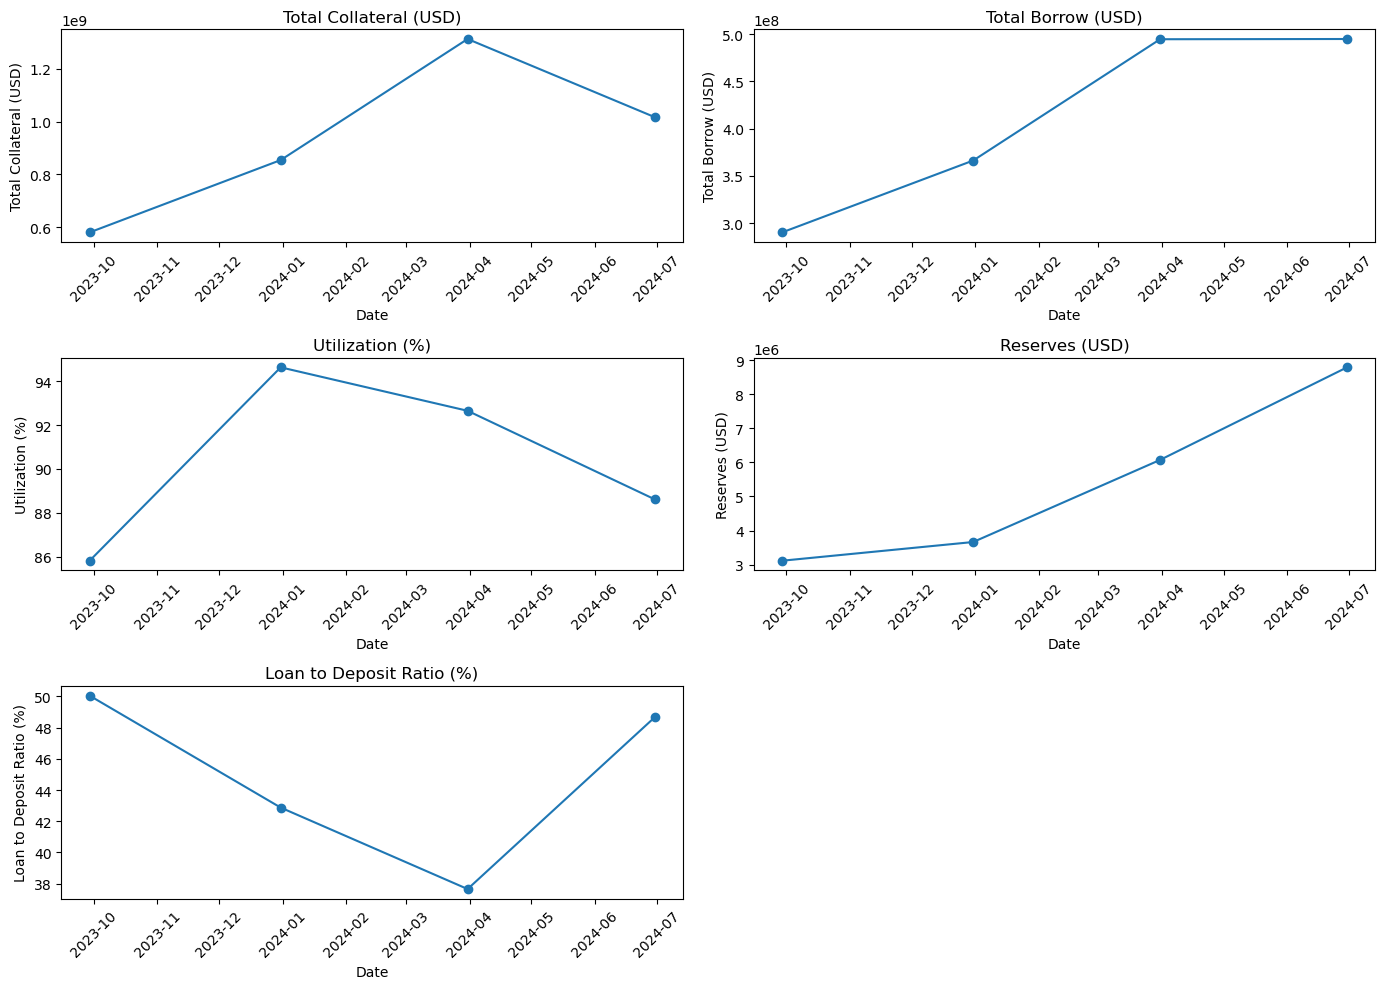

In [172]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date

# Generate the base list of dates
dates = ["2023-09-29", "2023-12-31", "2024-03-31", "2024-06-30", date.today().strftime('%Y-%m-%d')]

# Check the number of rows in final_data
num_rows = len(final_data)
print("Number of rows in final_data:", num_rows)

# Adjust the dates list to match the number of rows in final_data
if len(dates) < num_rows:
    # Add today's date repeatedly until the list matches the number of rows
    dates += [date.today().strftime('%Y-%m-%d')] * (num_rows - len(dates))
elif len(dates) > num_rows:
    # Trim the dates list to match the number of rows
    dates = dates[:num_rows]

# Convert the 'Date' column to datetime format in final_data
final_data['Date'] = pd.to_datetime(dates, errors='coerce')

# Define the metrics to be plotted
metrics = [
    'Total Collateral (USD)', 
    'Total Borrow (USD)', 
    'Utilization (%)', 
    'Reserves (USD)', 
    'Loan to Deposit Ratio (%)'
]

# Plot the metrics using Date as the x-axis
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics):
    plt.subplot(3, 2, i + 1)
    plt.plot(final_data['Date'], final_data[metric], marker='o')
    plt.title(metric)
    plt.xlabel('Date')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [173]:
print(final_data)

      Block  Total Collateral (USD)  Total Borrow (USD)  Utilization (%)  \
0  18242720            5.796149e+08        2.900577e+08        85.817242   
1  18903241            8.541403e+08        3.662118e+08        94.631021   
2  19551663            1.313831e+09        4.947549e+08        92.649818   
3  20202271            1.017493e+09        4.950010e+08        88.619305   

   Reserves (USD)  Loan to Deposit Ratio (%)       Date  
0    3.115844e+06                  50.043186 2023-09-29  
1    3.664389e+06                  42.874902 2023-12-31  
2    6.072939e+06                  37.657433 2024-03-31  
3    8.788000e+06                  48.649102 2024-06-30  


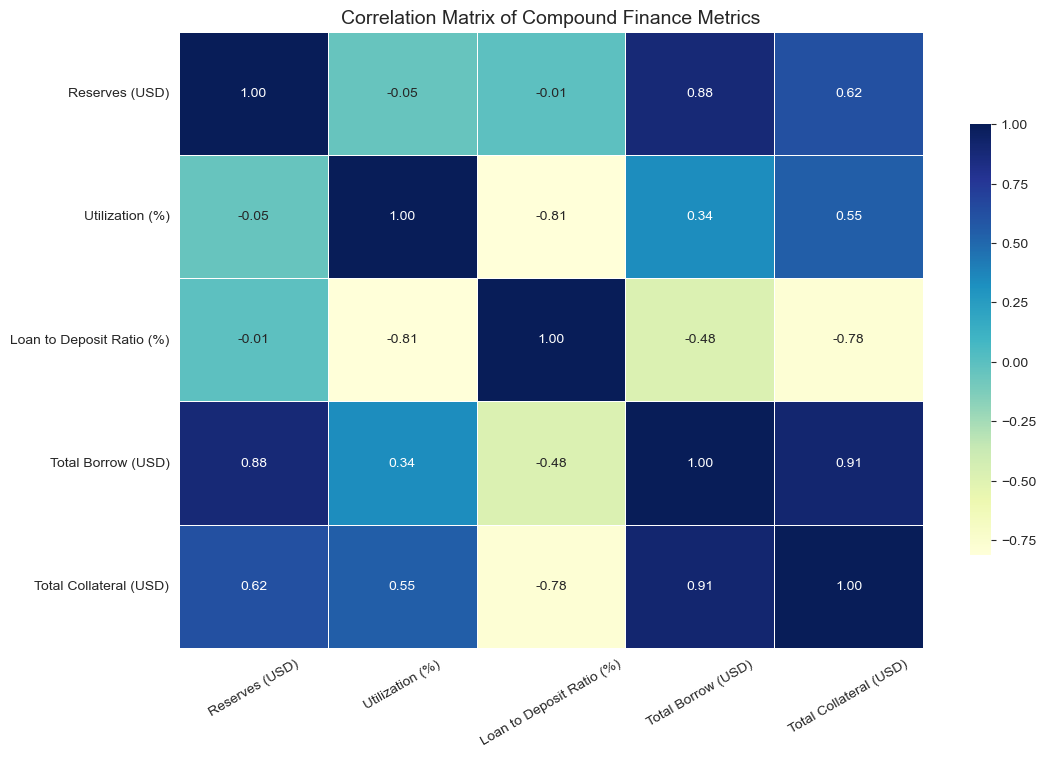

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a new order for the metrics to change the arrangement
metrics = [
    'Reserves (USD)', 
    'Utilization (%)', 
    'Loan to Deposit Ratio (%)',
    'Total Borrow (USD)', 
    'Total Collateral (USD)'
]

# Calculate the correlation matrix with the new order
correlation_matrix = final_data[metrics].corr()

# Set up the matplotlib figure with a different size
plt.figure(figsize=(12, 8))

# Create a heatmap with a different color palette
sns.set_style("whitegrid")  # Keep the seaborn style
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="YlGnBu",  # Changed the color scheme to "coolwarm"
    cbar_kws={'shrink': 0.7}, 
    linewidths=0.5,  # Add subtle grid lines
    fmt=".2f"
)

# Customize the title and label rotation
plt.title("Correlation Matrix of Compound Finance Metrics", fontsize=14)
plt.xticks(rotation=30)  
plt.yticks(rotation=0)   
plt.show()


## ✅ Summary

This notebook provides a foundation for extracting and analyzing on-chain smart contract data using Web3.py and Infura. It can be extended for DeFi analytics, NFT contract reviews, or blockchain forensic studies.